# Here we attempt an initial model of the virus based on data from https://ourworldindata.org/coronavirus-source-data; here, the 'full dataset' is used to model the progression of COVID-19 from late February up to very recently.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dateutil import parser
#Here, file containing all relevant data is converted into a pandas dataframe and parsed according to dates
df = pd.read_csv('full_data.csv', parse_dates = ['date'], index_col = ['date'])
#First 20 rows of the new dataframe
df.head(20)

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-02-25,Afghanistan,NaN,NaN,1,NaN
2020-02-26,Afghanistan,0.0,NaN,1,NaN
2020-02-27,Afghanistan,0.0,NaN,1,NaN
2020-02-28,Afghanistan,0.0,NaN,1,NaN
2020-02-29,Afghanistan,0.0,NaN,1,NaN
2020-03-01,Afghanistan,0.0,NaN,1,NaN
2020-03-02,Afghanistan,0.0,NaN,1,NaN
2020-03-03,Afghanistan,0.0,NaN,1,NaN
2020-03-04,Afghanistan,0.0,NaN,1,NaN


In [43]:
#number of entries
len(df)

2407

In [45]:
#list generator function to create a list of all 
def Listgen(x):
    cases = []
    i = 0
    for i in range(len(x)):
        if x['new_cases'].iloc[i] != 0:
            cases.append(x['new_cases'].iloc[i])
            i = i + 1
       
        
    return cases

In [150]:
df['new_cases']

0           NaN
1           0.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          3.0
13          0.0
14          0.0
15          0.0
16          3.0
17          0.0
18          0.0
19          NaN
20          0.0
21          8.0
22          0.0
23         13.0
24         10.0
25          NaN
26          0.0
27          0.0
28          0.0
29          0.0
         ...   
2377     2056.0
2378     1526.0
2379     1277.0
2380    19572.0
2381     1903.0
2382     1872.0
2383      542.0
2384     1021.0
2385     1023.0
2386     1017.0
2387      517.0
2388      896.0
2389      864.0
2390     1175.0
2391     1353.0
2392     1748.0
2393     1727.0
2394     1801.0
2395     1912.0
2396     2217.0
2397     2220.0
2398     2864.0
2399     3730.0
2400     3644.0
2401     3979.0
2402     4119.0
2403     4611.0
2404     6936.0
2405     7488.0
2406     9766.0
Name: new_cases, Length:

In [46]:
z = Listgen(df)

In [47]:
z

[nan,
 3.0,
 3.0,
 nan,
 8.0,
 13.0,
 10.0,
 nan,
 4.0,
 7.0,
 5.0,
 3.0,
 5.0,
 1.0,
 nan,
 1.0,
 nan,
 nan,
 1.0,
 7.0,
 3.0,
 5.0,
 2.0,
 12.0,
 3.0,
 nan,
 7.0,
 nan,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 10.0,
 14.0,
 5.0,
 12.0,
 3.0,
 15.0,
 20.0,
 10.0,
 18.0,
 57.0,
 nan,
 2.0,
 1.0,
 5.0,
 8.0,
 6.0,
 13.0,
 10.0,
 19.0,
 38.0,
 8.0,
 19.0,
 51.0,
 120.0,
 59.0,
 143.0,
 nan,
 6.0,
 2.0,
 nan,
 18.0,
 7.0,
 5.0,
 2.0,
 7.0,
 2.0,
 7.0,
 23.0,
 30.0,
 1.0,
 79.0,
 6.0,
 15.0,
 nan,
 nan,
 5.0,
 3.0,
 3.0,
 9.0,
 nan,
 7.0,
 15.0,
 27.0,
 59.0,
 60.0,
 31.0,
 39.0,
 28.0,
 47.0,
 285.0,
 nan,
 nan,
 1.0,
 nan,
 2.0,
 7.0,
 nan,
 1.0,
 1.0,
 4.0,
 6.0,
 6.0,
 6.0,
 9.0,
 18.0,
 25.0,
 21.0,
 nan,
 11.0,
 13.0,
 nan,
 2.0,
 2.0,
 1.0,
 nan,
 nan,
 1.0,
 1.0,
 2.0,
 2.0,
 nan,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 5.0,
 8.0,
 3.0,
 15.0,
 6.0,
 6.0,
 5.0,
 15.0,
 16.0,
 45.0,
 38.0,
 nan,

In [48]:
# Returns a list of entries numbering the reported cases chronologically

def X(x):
    G = []
    i = 0
    for i in range(len(x)):
        G.append(i)
        i = i + 1
    return G



In [49]:
X(df)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [155]:
#Also generates a set of discrete x values for the following graph
np.linspace(0, len(z), len(z) + 1)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.171e+03, 1.172e+03,
       1.173e+03])

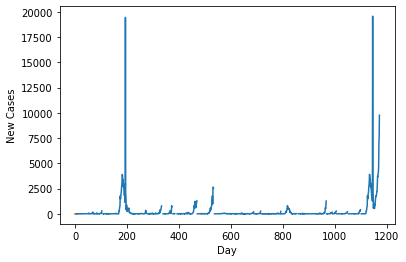

In [156]:
#Classifies cases in order of listing in the original report file; not necessarily representative of new cases as a function of time.
plt.xlabel('Incident No.')
plt.ylabel('New Cases')
#plt.figure(figsize = (16,12))
plt.plot(X(z), z, (12,14))
#plt.plot(X(z), z + 1, (8,3))

In [52]:
from dateutil.parser import parse 

In [53]:
#Visualising a Time Series of the Reported Data According to Dates

In [54]:
df.head()

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-02-25,Afghanistan,NaN,NaN,1,NaN
2020-02-26,Afghanistan,0.0,NaN,1,NaN
2020-02-27,Afghanistan,0.0,NaN,1,NaN
2020-02-28,Afghanistan,0.0,NaN,1,NaN
2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [157]:
df['location'].iloc[1250]

'Luxembourg'

In [158]:
len(df)

2407

In [159]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl

In [189]:
# Generate new lists to make a smaller dataframe called 'novus'
def listener(x):
    A = []
    for i in range(len(x)):
        A.append(x[i])
    return A

In [190]:
x1 =listener(df['new_cases'])

In [191]:
y1 = listener(df['date'])

In [192]:
novus = pd.DataFrame({'date' : y1,
                      
                      'new cases' : x1
                      
                      })

In [193]:
len(novus)

2407

In [194]:
novus.head()

,date,new cases
0,2020-02-25,NaN
1,2020-02-26,0.0
2,2020-02-27,0.0
3,2020-02-28,0.0
4,2020-02-29,0.0


<function matplotlib.pyplot.show(*args, **kw)>

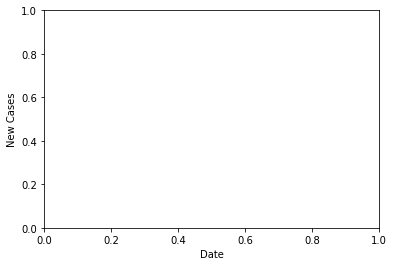

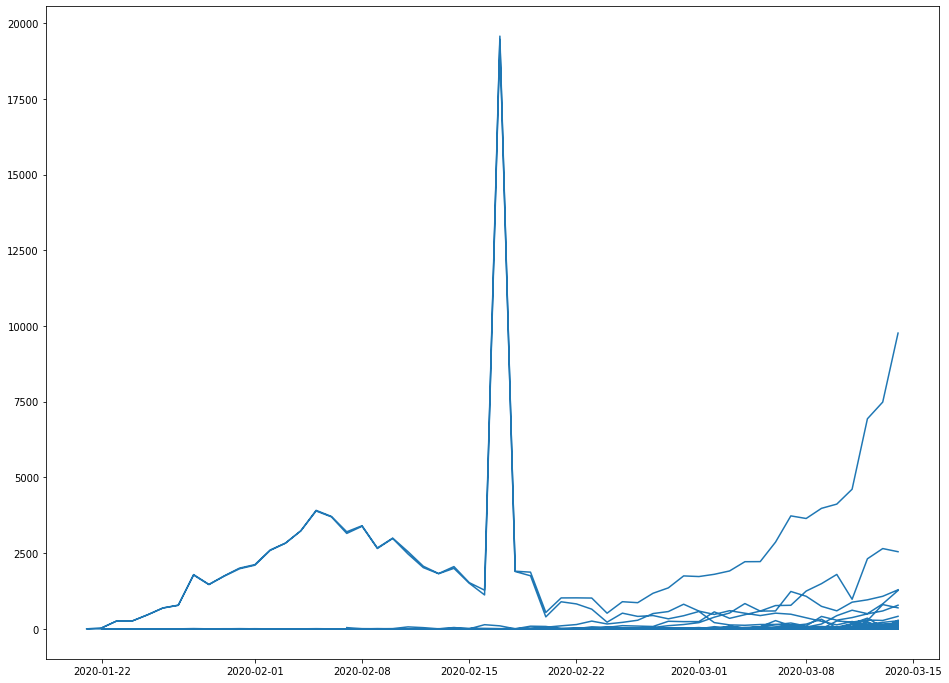

In [195]:
#Graph resulting fro Novus of New Cases Vs Time
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.figure(figsize = (16,12))
plt.plot(novus['date'],novus['new cases'])
plt.show